# decision trees

In [1]:
import graphviz
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (17, 10)
import numpy as np
import pandas as pd
import sklearn.datasets
import sklearn.tree

Decision trees are directed graphs beginning with one node and branching to many. They are a hierarchical data structure that represent data by implementing a divide-and-conquer strategy. There are two main types of decision tree: classification and regression, and both are used to make predictions based on data. Classification trees output a discrete category/class/target while regression trees output real values. Regression tree algorithms were introduced in 1963 ([reference](http://sci-hub.cc/10.1080/01621459.1963.10500855)).

Moving through a decision tree, each node splits up the input data. Each node is a sort of cluster of cases that is to be split by further branches in the tree. Often trees are binary, wherein each node is split into two subsamples, but they don't have to be binary.

So, imagine there are some colored shapes that can be classified as A, B or C.

![](media/colors_shapes.png)

A classification decision tree for the colored shapes could look like this:

![](media/decision_tree_colors_shapes.png)

Decision trees can be seen as a compact way to represent a lot of data. A usual goal in defining a decision tree is to search for one that is as small as possible.

## super simple example of decision tree classifier

scikit-learn provides a `DecisionTreeClassifier`. It takes as input two arrays, an array of data features and an array of class labels for each collection of features.

Create some data. There are features and there are classifications for each collection of features.

In [2]:
# features
X = [
        [0, 0],
        [1, 1]
    ]

# targets
Y = [
        0,
        1
    ]

classifier = sklearn.tree.DecisionTreeClassifier()
classifier = classifier.fit(X, Y)

Now, predict the class of some example collection of features.

In [3]:
classifier.predict(
    [
        [2, 2]
    ]
)

array([1])

The *probability* of each class can be predicted too, which is the fraction of training samples of the same class in a leaf.

In [4]:
classifier.predict_proba(
    [
        [2, 2]
    ]
)

array([[ 0.,  1.]])

We can look at the tree in Graphviz format.

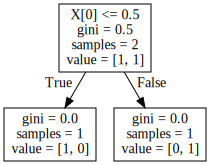

In [5]:
graph = graphviz.Source(sklearn.tree.export_graphviz(classifier, out_file = None))
graph

## more detailed example of decision tree classifier using the iris dataset

Get the iris dataset.

In [6]:
iris = sklearn.datasets.load_iris()

The top bit of the dataset looks like this:

In [7]:
pd.DataFrame(
    data    = np.c_[iris["data"], iris["target"]],
    columns = iris["feature_names"] + ["target"]
).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Make a decision tree and then fit it using the features ("data") and class labels ("target") of the iris dataset.

In [8]:
classifier = sklearn.tree.DecisionTreeClassifier()
classifier = classifier.fit(iris.data, iris.target)

Ok, let's look at the tree, but we'll fancy it up this time with colors and shit.

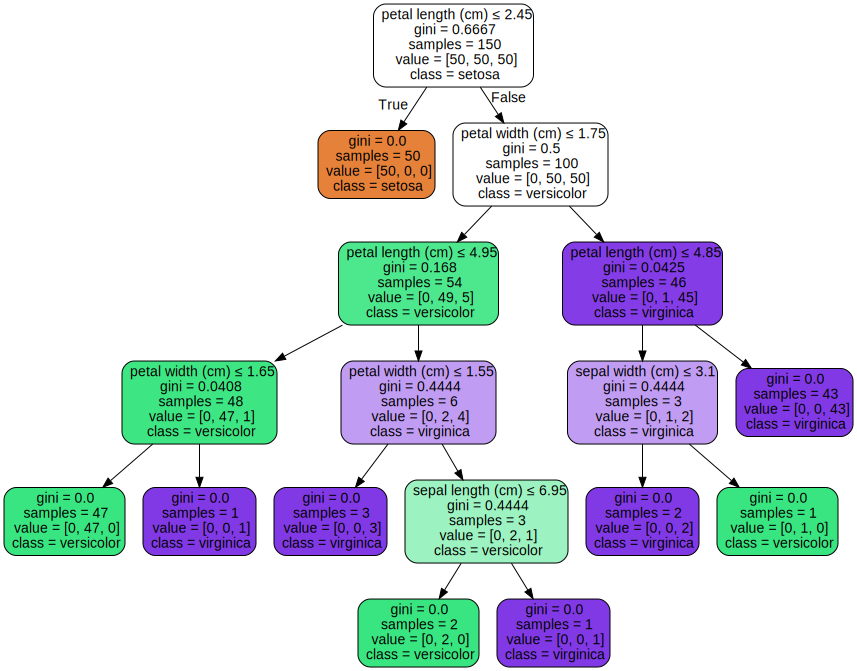

In [9]:
graph = graphviz.Source(
    sklearn.tree.export_graphviz(
        classifier,
        out_file           = None,
        feature_names      = iris.feature_names,
        class_names        = iris.target_names,
        filled             = True,
        rounded            = True,
        special_characters = True
    )
)
graph

Right, so now let's make some predictions.

In [10]:
classifier.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

How accurate is it? Well, here is what is should have got:

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Boom, it's awesome. Well done, decision tree. :)

## decision tree regressor

Now, let's take a glance at a decision tree for regression, or modelling something. Here, let's model a slightly noisy sine curve.

In [12]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

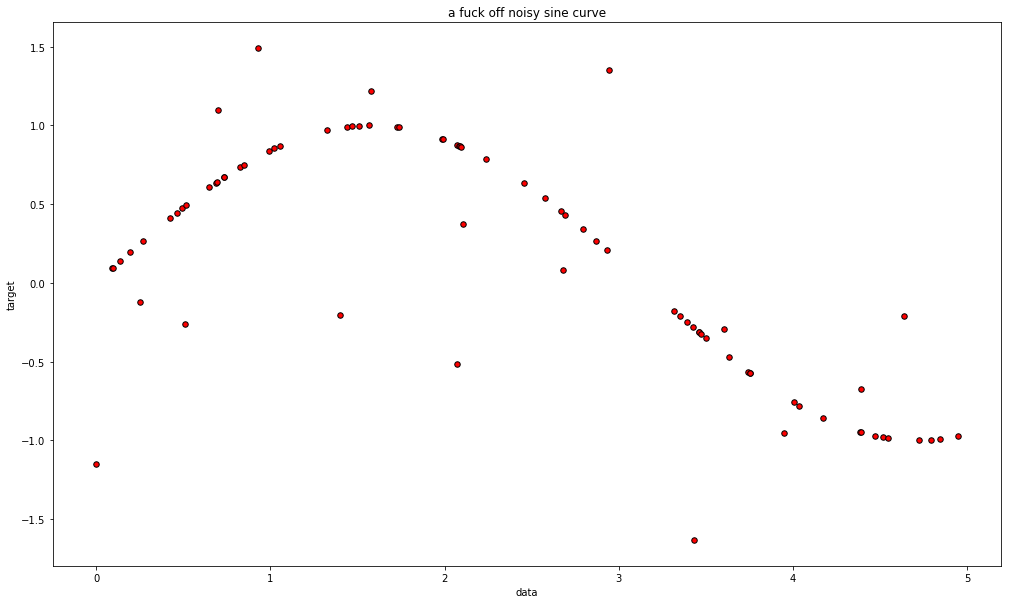

In [13]:
plt.scatter(X, y, s = 30, edgecolor = "black", c = "red", label = "data")
plt.title("a fuck off noisy sine curve")
plt.xlabel("data")
plt.ylabel("target")
plt.show()

Aait, let's create and fit a decision tree with a depth of like 2 nodes.

In [14]:
regressor = sklearn.tree.DecisionTreeRegressor(max_depth = 2)
regressor.fit(X, y);

Ok, let's make some predictions and see how it does.

In [15]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_prediction = regressor.predict(X_test)

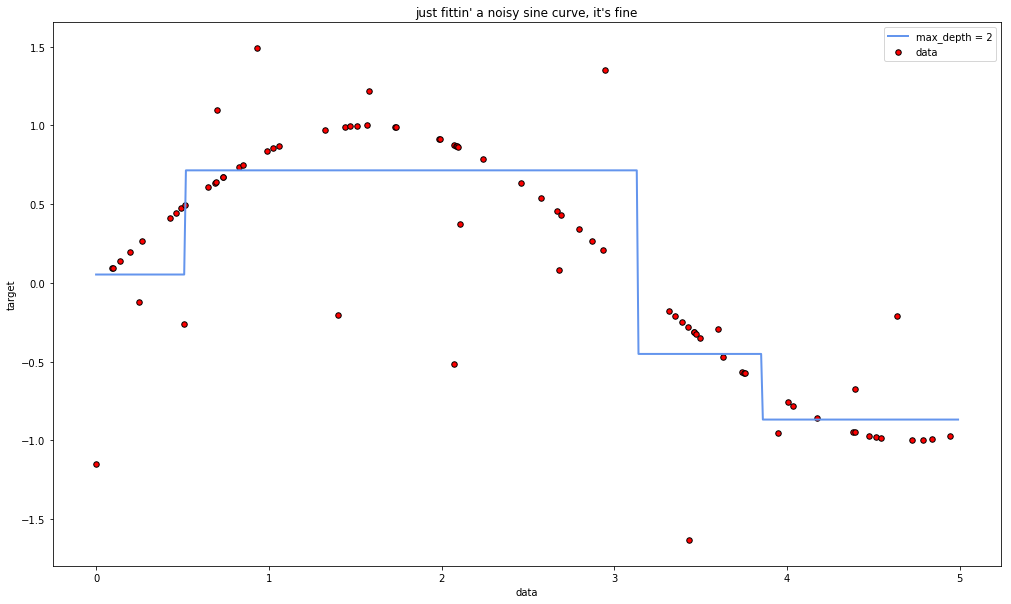

In [16]:
plt.scatter(X, y, s = 30, edgecolor = "black", c = "red", label = "data")
plt.plot(X_test, y_prediction, color = "cornflowerblue", label = "max_depth = 2", linewidth = 2)
plt.title("just fittin' a noisy sine curve, it's fine")
plt.xlabel("data")
plt.ylabel("target")
plt.legend()
plt.show()

Damn, that shit is woke!

![](media/BMO_1.gif)

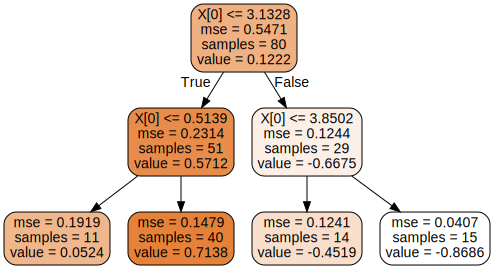

In [17]:
graph = graphviz.Source(
    sklearn.tree.export_graphviz(
        regressor,
        out_file           = None,
        filled             = True,
        rounded            = True
    )
)
graph

Ok, now let's try a tree with greater depth, like 5 nodes.

In [18]:
regressor = sklearn.tree.DecisionTreeRegressor(max_depth = 5)
regressor.fit(X, y);

In [19]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_prediction = regressor.predict(X_test)

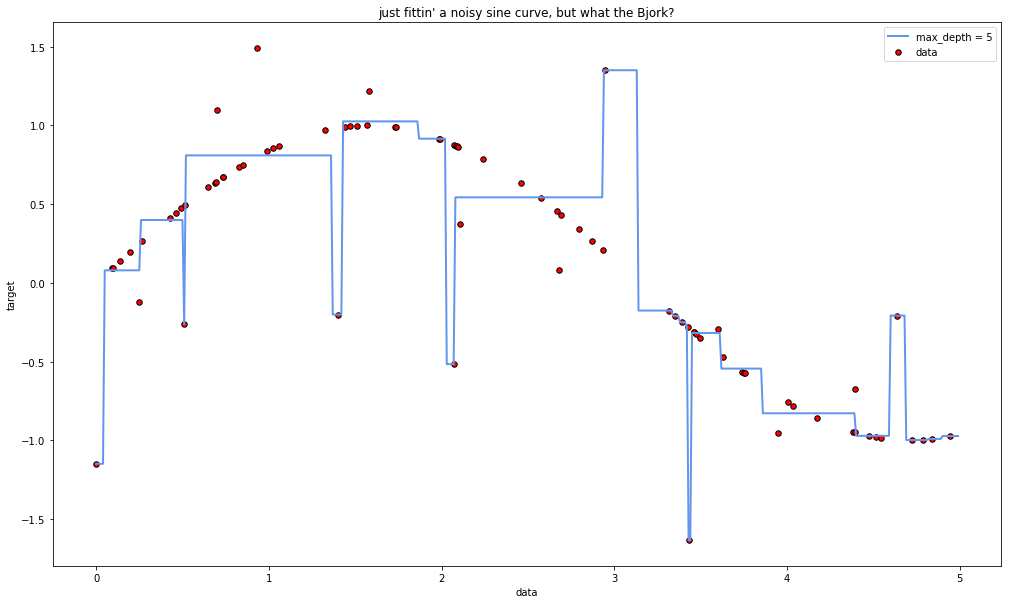

In [20]:
plt.scatter(X, y, s = 30, edgecolor = "black", c = "red", label = "data")
plt.plot(X_test, y_prediction, color = "cornflowerblue", label = "max_depth = 5", linewidth = 2)
plt.title("just fittin' a noisy sine curve, but what the Bjork?")
plt.xlabel("data")
plt.ylabel("target")
plt.legend()
plt.show()

Yeah ok, naw.

![](media/BMO_2.gif)

It turns out that learning a tree that classifies or models data *perfectly* may not lead to a tree with good generalization performance. There could be noise in the data (as there was in this example) or the algorithm might be making decisions based on low statistics (very little data).

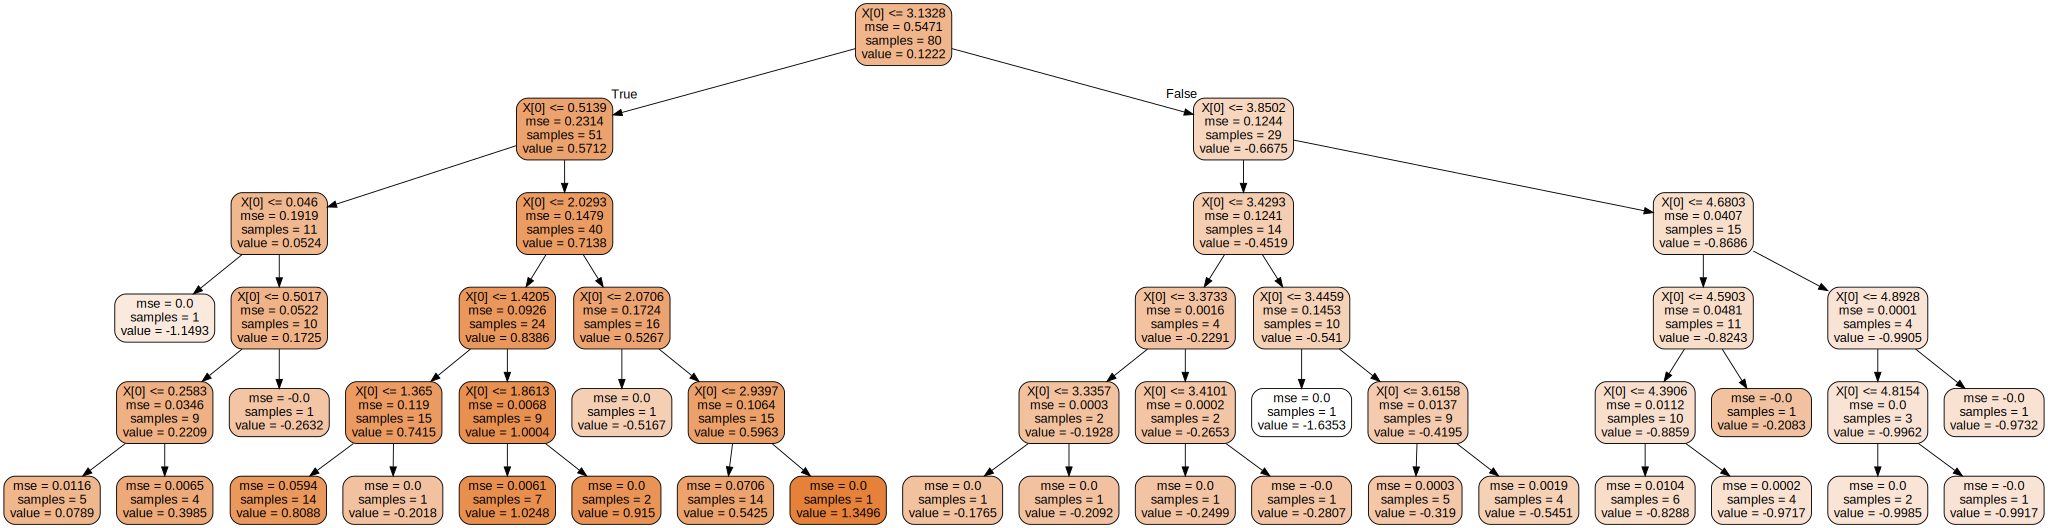

In [21]:
graph = graphviz.Source(
    sklearn.tree.export_graphviz(
        regressor,
        out_file           = None,
        filled             = True,
        rounded            = True
    )
)
graph